# Metrics

## Classification

## imbalanced data

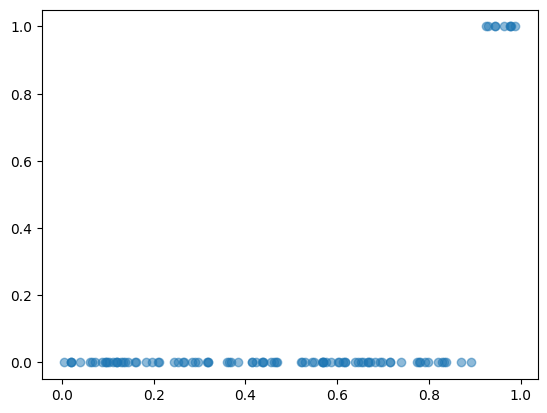

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
np.random.seed(0)
x = np.random.uniform(0, 1, size=n)
y = np.random.binomial(n=1, p=x)
y[x < 0.9] = 0

plt.scatter(x, y, alpha=.5)

In [2]:
y.mean()

0.09

In [3]:
X = x.reshape(-1, 1)

(array([31., 13., 10., 13., 10.,  5.,  7.,  2.,  2.,  7.]),
 array([0.0217468 , 0.04332273, 0.06489867, 0.08647461, 0.10805055,
        0.12962649, 0.15120243, 0.17277836, 0.1943543 , 0.21593024,
        0.23750618]),
 <BarContainer object of 10 artists>)

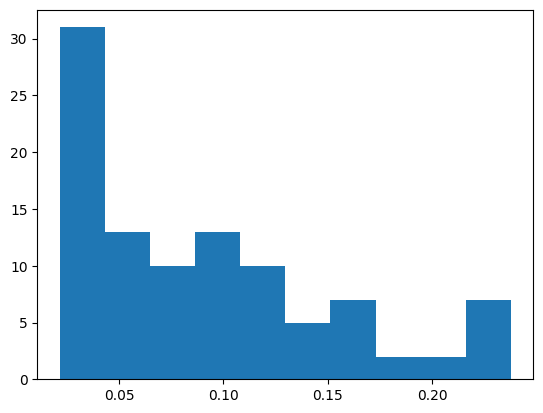

In [4]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)
p_pred = clf.predict_proba(X)[:, 1]

plt.hist(p_pred)

In [5]:
np.median(p_pred)

0.07147041581159291

In [6]:
np.mean(p_pred)

0.090000036374747

## コサイン類似度

ベクトルの方向が似ているものは似ている


[コサイン類似度（Cosine Similarity）とは？：AI・機械学習の用語辞典 - ＠IT](https://atmarkit.itmedia.co.jp/ait/articles/2112/08/news020.html)


2つのベクトルがなす角（コサイン）の値が類似度として使える、ということになる

$$
\newcommand{\b}[1]{\boldsymbol{#1}}
\b{a} \cdot \b{b} = ||\b{a}|| \ ||\b{b}|| \cos(\b{a}, \b{b})
\\
\implies \cos(\b{a}, \b{b}) = \frac{ \b{a} \cdot \b{b} }{ ||\b{a}|| \ ||\b{b}|| }
$$



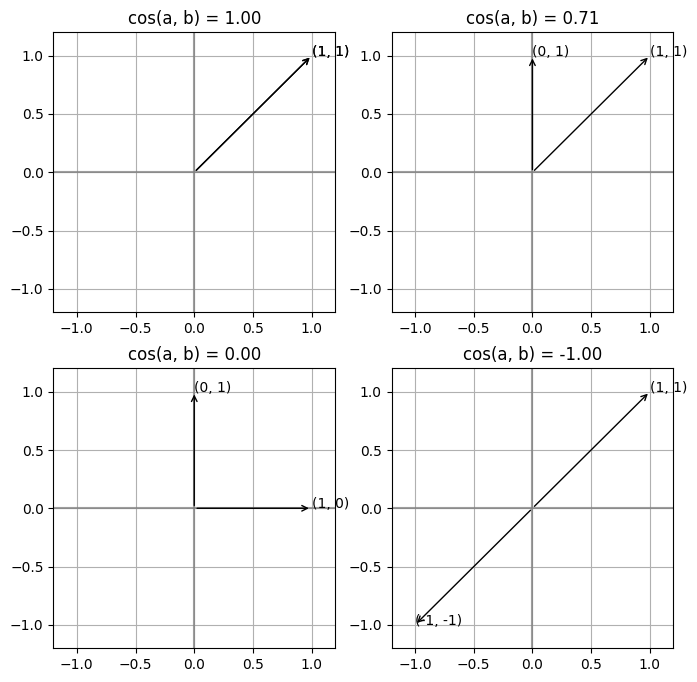

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def cos(a, b):
    e = 1e-8
    return a @ b / (np.linalg.norm(a + e) * np.linalg.norm(b + e))

def plot(ax, a, b):
    for x in [a, b]:
        ax.axhline(color="gray", alpha=.5)
        ax.axvline(color="gray", alpha=.5)
        ax.text(x[0], x[1], f"{x[0], x[1]}", color="black")
        ax.annotate("", xy=(x[0], x[1]), xytext=(0, 0),
                    arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
        ax.set(title=f"cos(a, b) = {cos(a, b):.2f}", xlim=(-1.2, 1.2), ylim=(-1.2, 1.2))
        ax.grid(True)
    return ax


data = [
    [
        [
            np.array([1, 1]),
            np.array([1, 1])
        ],
        [
            np.array([0, 1]),
            np.array([1, 1])
        ],
    ],
    [
        [
            np.array([1, 0]),
            np.array([0, 1])
        ],
        [
            np.array([1, 1]),
            np.array([-1, -1])
        ],
    ]
]

fig, axes = plt.subplots(figsize=(8, 8), nrows=2, ncols=2)
for i in range(2):
    for j in range(2):
        a, b = data[i][j]
        plot(axes[i, j], a, b)
fig.show()

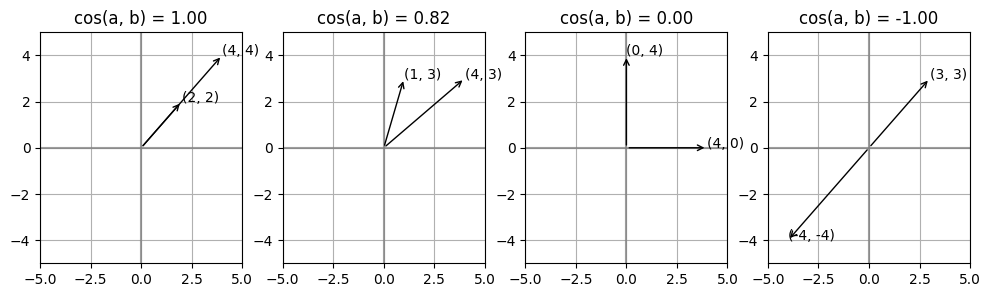

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def cos(a, b):
    e = 1e-8
    return a @ b / (np.linalg.norm(a + e) * np.linalg.norm(b + e))

def plot(ax, a, b):
    for x in [a, b]:
        ax.axhline(color="gray", alpha=.5)
        ax.axvline(color="gray", alpha=.5)
        ax.text(x[0], x[1], f"{x[0], x[1]}", color="black")
        ax.annotate("", xy=(x[0], x[1]), xytext=(0, 0),
                    arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
        ax.set(title=f"cos(a, b) = {cos(a, b):.2f}", xlim=(-5, 5), ylim=(-5, 5))
        ax.grid(True)
    return ax


data = [
    [
        np.array([4, 4]),
        np.array([2, 2])
    ],
    [
        np.array([1, 3]),
        np.array([4, 3])
    ],
    [
        np.array([4, 0]),
        np.array([0, 4])
    ],
    [
        np.array([3, 3]),
        np.array([-4, -4])
    ]
]

fig, axes = plt.subplots(figsize=(12, 3), ncols=4)
for i in range(4):
    a, b = data[i]
    plot(axes[i], a, b)
fig.show()

## Regression


### RMSEとMAE

どっちがいいか？という議論があるらしい

[Chai, T., & Draxler, R. R. (2014). Root mean square error (RMSE) or mean absolute error (MAE)?–Arguments against avoiding RMSE in the literature. Geoscientific model development, 7(3), 1247-1250.](https://gmd.copernicus.org/articles/7/1247/2014/gmd-7-1247-2014.pdf)